# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn import metrics
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [2]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [5]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

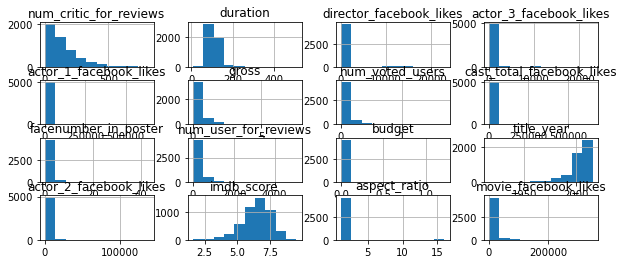

In [6]:
df.hist()

In [7]:
df["imdb_score"].isna().sum()

0

# Preprocess Data

dropping na values for imbd_score

In [8]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_name                  0.257783
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
imdb_score                    0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link               0.000000
genres                        0.000000
cast_total_facebook_likes

Remove the in-between imdb_score of low and high

In [9]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

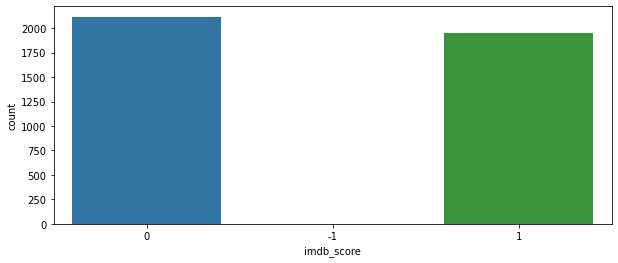

In [10]:
sns.countplot(x="imdb_score", data=df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

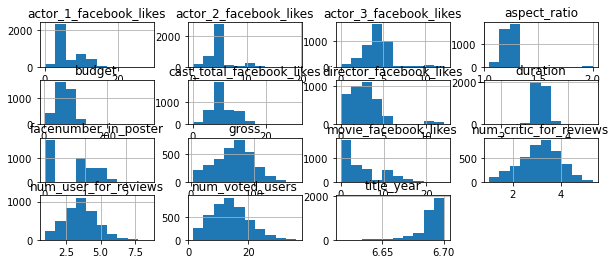

In [11]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [12]:
y.head()

0    1
1    1
3    1
4    1
6    0
Name: imdb_score, dtype: category
Categories (3, int64): [0 < -1 < 1]

In [13]:
X.skew().sort_values()

title_year                  -2.314518
duration                    -0.613130
num_critic_for_reviews      -0.249052
facenumber_in_poster        -0.049683
gross                       -0.017354
num_user_for_reviews         0.330804
num_voted_users              0.407429
cast_total_facebook_likes    0.560907
actor_3_facebook_likes       0.723280
budget                       0.799051
actor_1_facebook_likes       0.809816
movie_facebook_likes         0.896084
actor_2_facebook_likes       1.269669
director_facebook_likes      1.583038
aspect_ratio                 6.427998
dtype: float64

In [14]:
X.isna().sum().sort_values(ascending=False) / len(X) * 100

gross                        19.080403
budget                       10.130317
aspect_ratio                  6.810917
content_rating                6.466683
plot_keywords                 3.319400
title_year                    2.434227
director_facebook_likes       2.335874
director_name                 2.335874
num_critic_for_reviews        1.180231
num_user_for_reviews          0.491763
actor_3_facebook_likes        0.491763
actor_3_name                  0.491763
facenumber_in_poster          0.319646
duration                      0.319646
actor_2_name                  0.295058
actor_2_facebook_likes        0.295058
language                      0.245881
actor_1_name                  0.147529
actor_1_facebook_likes        0.147529
country                       0.098353
genres                        0.000000
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
cast_total_facebook_likes     0.000000
num_voted_users          

# Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
2799,10.466351,Anthony Hopkins,4.934733,Nick Cannon,4.423843,Brian Geraghty,1.238132,61.169088,10.784708,R,...,57.855961,English,0.000000,http://www.imdb.com/title/tt0308055/?ref_=fn_t...,Bobby,3.736876,4.053600,13.974969,campaign|chess|friend|hotel|senator,6.692413
4262,5.623413,Hedy Lamarr,5.250533,Spencer Tracy,4.415154,Claudette Colbert,1.081883,35.643134,7.109642,Passed,...,NaN,English,3.919476,http://www.imdb.com/title/tt0032273/?ref_=fn_t...,Boom Town,1.861210,2.414736,6.901740,oil|oil field|oil tycoon|partnership|wildcatter,6.636673
98,4.829473,Mark Chinnery,3.208680,Shin'ya Tsukamoto,1.861210,Atsuko Maeda,1.238132,NaN,5.141849,NaN,...,NaN,Japanese,0.000000,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,Godzilla Resurgence,1.000000,1.898829,4.397622,blood|godzilla|monster|sequel,6.700738
495,5.220922,Richard Tyson,3.288868,Michael Byrne,2.530440,John Topor,1.238132,81.444764,5.582192,PG-13,...,68.071690,English,0.000000,http://www.imdb.com/title/tt0185183/?ref_=fn_t...,Battlefield Earth,3.631929,6.013841,15.995604,alien|bad acting|pulp fiction|resistance fight...,6.687403
3499,5.466544,Minnie Driver,5.076239,Nate Parker,5.064732,Darryl Stephens,NaN,51.436867,7.467756,PG-13,...,61.827781,English,0.000000,http://www.imdb.com/title/tt3125324/?ref_=fn_t...,Beyond the Lights,2.902783,2.466326,10.285306,domestic abuse|public humiliation|sex symbol|s...,6.699075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,10.466351,Steve Buscemi,5.283046,Tyler Labine,5.250533,Sean Hayes,1.166253,118.920712,11.041463,G,...,128.006302,English,14.483155,http://www.imdb.com/title/tt1453405/?ref_=fn_t...,Monsters University,4.403489,4.034702,22.018033,cheating|fraternity|monster|singing in a car|u...,6.698244
2882,11.892071,Natalie Portman,11.066819,Jake Gyllenhaal,5.623413,Ethan Suplee,1.238132,71.407419,14.095323,R,...,73.066365,English,10.000000,http://www.imdb.com/title/tt0765010/?ref_=fn_t...,Brothers,3.838088,3.765295,17.225281,afghanistan|death of soldier|presumed dead|pri...,6.694914
4456,5.394744,Jessica Szohr,3.482005,Jonathan Mangum,2.882121,Angela Jones,NaN,34.397906,5.834731,R,...,NaN,English,3.864348,http://www.imdb.com/title/tt0464054/?ref_=fn_t...,House at the End of the Drive,1.414214,1.565085,4.262148,ghost story|manson family|paranormal|real life...,6.699075
329,10.241137,Jon Lovitz,6.687403,Matthew Broderick,4.643690,Roger Bart,1.166253,97.400375,10.828290,PG-13,...,87.818244,English,0.000000,http://www.imdb.com/title/tt0327162/?ref_=fn_t...,The Stepford Wives,3.605551,4.491574,14.933935,community|connecticut|fem bot|tv producer|writer,6.690744


# Fill na values

In [16]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()


actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [17]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
language                      object
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [18]:
value_counts = X_train["language"].value_counts()
value_counts

English       3019
French          53
Spanish         29
Hindi           21
Mandarin        21
Japanese        15
German          12
Italian          8
Korean           8
Russian          7
Cantonese        5
Hebrew           4
Persian          4
Polish           4
Danish           4
Dutch            4
Portuguese       4
Swedish          3
Arabic           3
Icelandic        2
Chinese          2
None             2
Indonesian       2
Bosnian          1
Thai             1
Tamil            1
Romanian         1
Mongolian        1
Norwegian        1
Dzongkha         1
Aramaic          1
Hungarian        1
Kazakh           1
Czech            1
Swahili          1
Vietnamese       1
Zulu             1
Dari             1
Maya             1
Telugu           1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

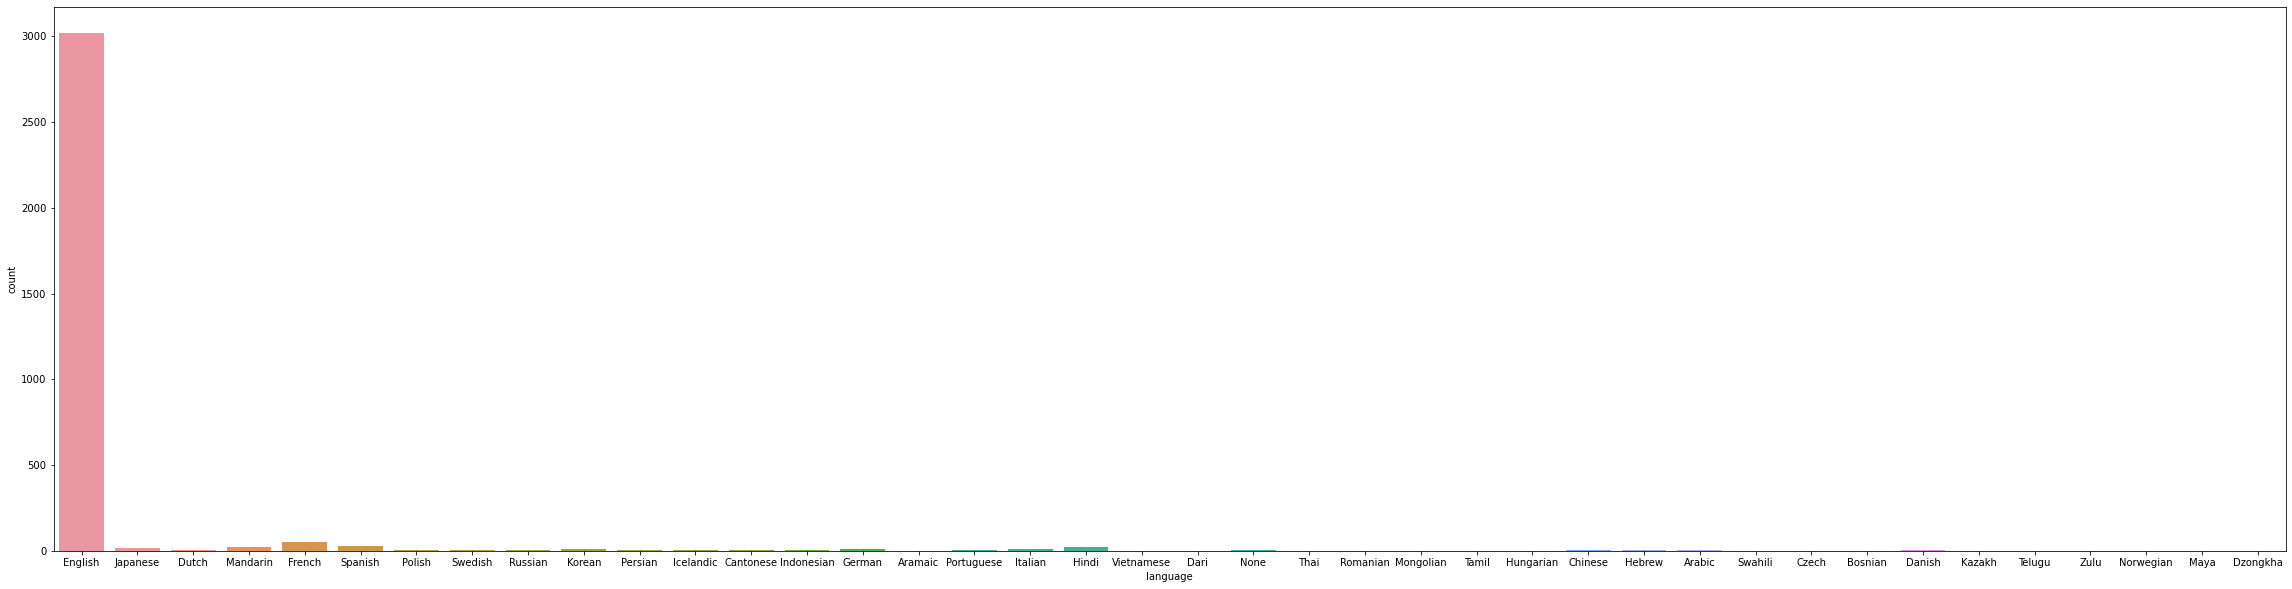

In [19]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X_train)

View columns in percentage

In [20]:
X_train['language'].value_counts(normalize=True) * 100

English       92.806640
French         1.629265
Spanish        0.891485
Hindi          0.645558
Mandarin       0.645558
Japanese       0.461113
German         0.368890
Italian        0.245927
Korean         0.245927
Russian        0.215186
Cantonese      0.153704
Hebrew         0.122963
Persian        0.122963
Polish         0.122963
Danish         0.122963
Dutch          0.122963
Portuguese     0.122963
Swedish        0.092223
Arabic         0.092223
Icelandic      0.061482
Chinese        0.061482
None           0.061482
Indonesian     0.061482
Bosnian        0.030741
Thai           0.030741
Tamil          0.030741
Romanian       0.030741
Mongolian      0.030741
Norwegian      0.030741
Dzongkha       0.030741
Aramaic        0.030741
Hungarian      0.030741
Kazakh         0.030741
Czech          0.030741
Swahili        0.030741
Vietnamese     0.030741
Zulu           0.030741
Dari           0.030741
Maya           0.030741
Telugu         0.030741
Name: language, dtype: float64

English accounts for about 93%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [21]:
X_train = X_train.drop("language", axis=1)
X_test = X_test.drop("language", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [22]:
value_counts = X_train["country"].value_counts()
value_counts

USA                     2428
UK                       293
France                   101
Canada                    87
Germany                   61
Australia                 36
India                     27
China                     24
Spain                     23
Japan                     16
Italy                     15
New Zealand               12
South Korea               11
Mexico                    11
Hong Kong                 10
Russia                     7
Ireland                    7
Denmark                    6
South Africa               6
Netherlands                5
Brazil                     5
Poland                     5
Norway                     4
Sweden                     4
Iceland                    3
Israel                     3
Romania                    3
Switzerland                3
Iran                       3
Argentina                  3
Thailand                   3
Belgium                    3
Czech Republic             2
Hungary                    1
Kenya         

View country in percentage

In [23]:
value_counts = X_train["country"].value_counts() / X_train.shape[0] * 100
value_counts

USA                     74.638795
UK                       9.007070
France                   3.104826
Canada                   2.674454
Germany                  1.875192
Australia                1.106671
India                    0.830003
China                    0.737781
Spain                    0.707040
Japan                    0.491854
Italy                    0.461113
New Zealand              0.368890
South Korea              0.338149
Mexico                   0.338149
Hong Kong                0.307409
Russia                   0.215186
Ireland                  0.215186
Denmark                  0.184445
South Africa             0.184445
Netherlands              0.153704
Brazil                   0.153704
Poland                   0.153704
Norway                   0.122963
Sweden                   0.122963
Iceland                  0.092223
Israel                   0.092223
Romania                  0.092223
Switzerland              0.092223
Iran                     0.092223
Argentina     

<AxesSubplot:xlabel='country', ylabel='count'>

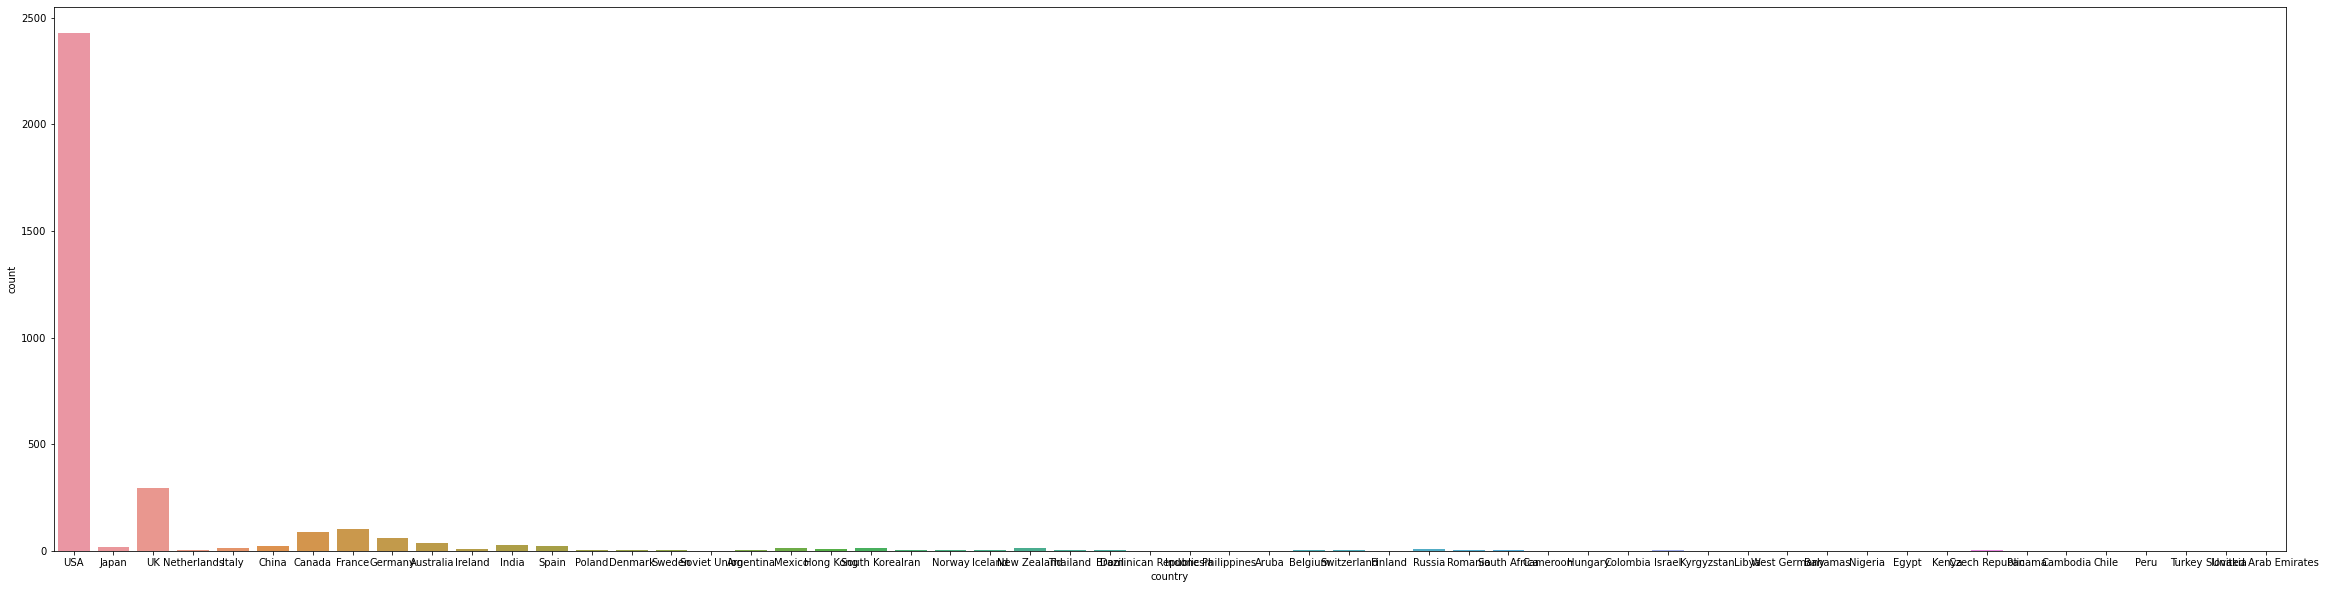

In [24]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X_train)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [25]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X_train = process_country(X_train)
X_test = process_country(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
2799,10.466351,4.934733,4.423843,1.238132,61.169088,10.784708,R,USA,0.000000,3.253153,0.000000,Drama|History,57.855961,0.000000,3.736876,4.053600,13.974969,campaign|chess|friend|hotel|senator,6.692413
4262,5.623413,5.250533,4.415154,1.081883,35.643134,7.109642,Passed,USA,1.565085,3.302834,1.681793,Adventure|Drama|Romance|Western,70.597606,3.919476,1.861210,2.414736,6.901740,oil|oil field|oil tycoon|partnership|wildcatter,6.636673
98,4.829473,3.208680,1.861210,1.238132,66.021958,5.141849,R,others,2.300327,3.309751,0.000000,Action|Adventure|Drama|Horror|Sci-Fi,70.597606,0.000000,1.000000,1.898829,4.397622,blood|godzilla|monster|sequel,6.700738
495,5.220922,3.288868,2.530440,1.238132,81.444764,5.582192,PG-13,USA,2.828427,3.302834,0.000000,Action|Adventure|Sci-Fi,68.071690,0.000000,3.631929,6.013841,15.995604,alien|bad acting|pulp fiction|resistance fight...,6.687403
3499,5.466544,5.076239,5.064732,1.238132,51.436867,7.467756,PG-13,USA,3.216221,3.281818,1.000000,Drama|Music,61.827781,0.000000,2.902783,2.466326,10.285306,domestic abuse|public humiliation|sex symbol|s...,6.699075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,10.466351,5.283046,5.250533,1.166253,118.920712,11.041463,G,USA,2.466326,3.193437,0.000000,Adventure|Animation|Comedy|Family|Fantasy,128.006302,14.483155,4.403489,4.034702,22.018033,cheating|fraternity|monster|singing in a car|u...,6.698244
2882,11.892071,11.066819,5.623413,1.238132,71.407419,14.095323,R,USA,4.015534,3.201086,0.000000,Drama|Thriller,73.066365,10.000000,3.838088,3.765295,17.225281,afghanistan|death of soldier|presumed dead|pri...,6.694914
4456,5.394744,3.482005,2.882121,1.238132,34.397906,5.834731,R,USA,2.759669,3.088591,0.000000,Horror|Thriller,70.597606,3.864348,1.414214,1.565085,4.262148,ghost story|manson family|paranormal|real life...,6.699075
329,10.241137,6.687403,4.643690,1.166253,97.400375,10.828290,PG-13,USA,0.000000,3.105423,1.000000,Comedy|Sci-Fi|Thriller,87.818244,0.000000,3.605551,4.491574,14.933935,community|connecticut|fem bot|tv producer|writer,6.690744


#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

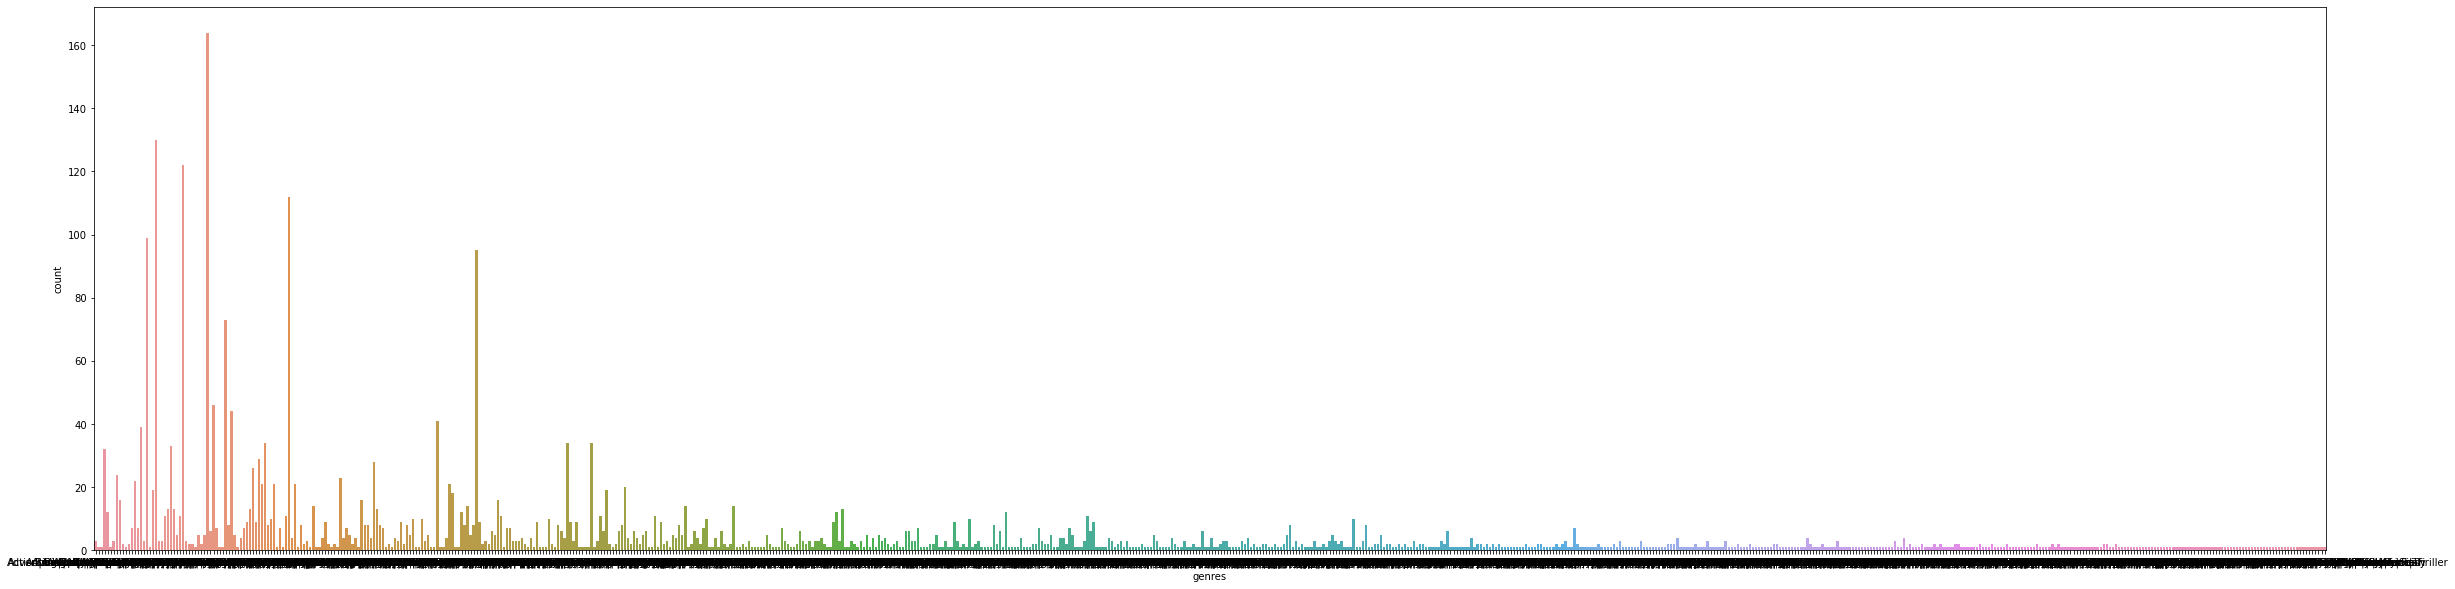

In [26]:
plt.figure(figsize=(40,10))
sns.countplot(x=X_train.genres) 

Genres are too complicated and interconnected, dropping this data as for right now

In [27]:
X_train = X_train.drop("genres", axis=1)
X_test = X_test.drop("genres",axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

View content rating in percentage

In [28]:
value_counts = X_train["content_rating"].value_counts() / X_train.shape[0] * 100
value_counts

R            47.156471
PG-13        28.804181
PG           13.956348
Not Rated     2.582232
G             2.551491
Unrated       1.168152
Approved      1.168152
TV-14         0.676299
TV-MA         0.522595
X             0.368890
TV-PG         0.245927
Passed        0.215186
TV-G          0.215186
NC-17         0.184445
GP            0.061482
M             0.061482
TV-Y          0.030741
TV-Y7         0.030741
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

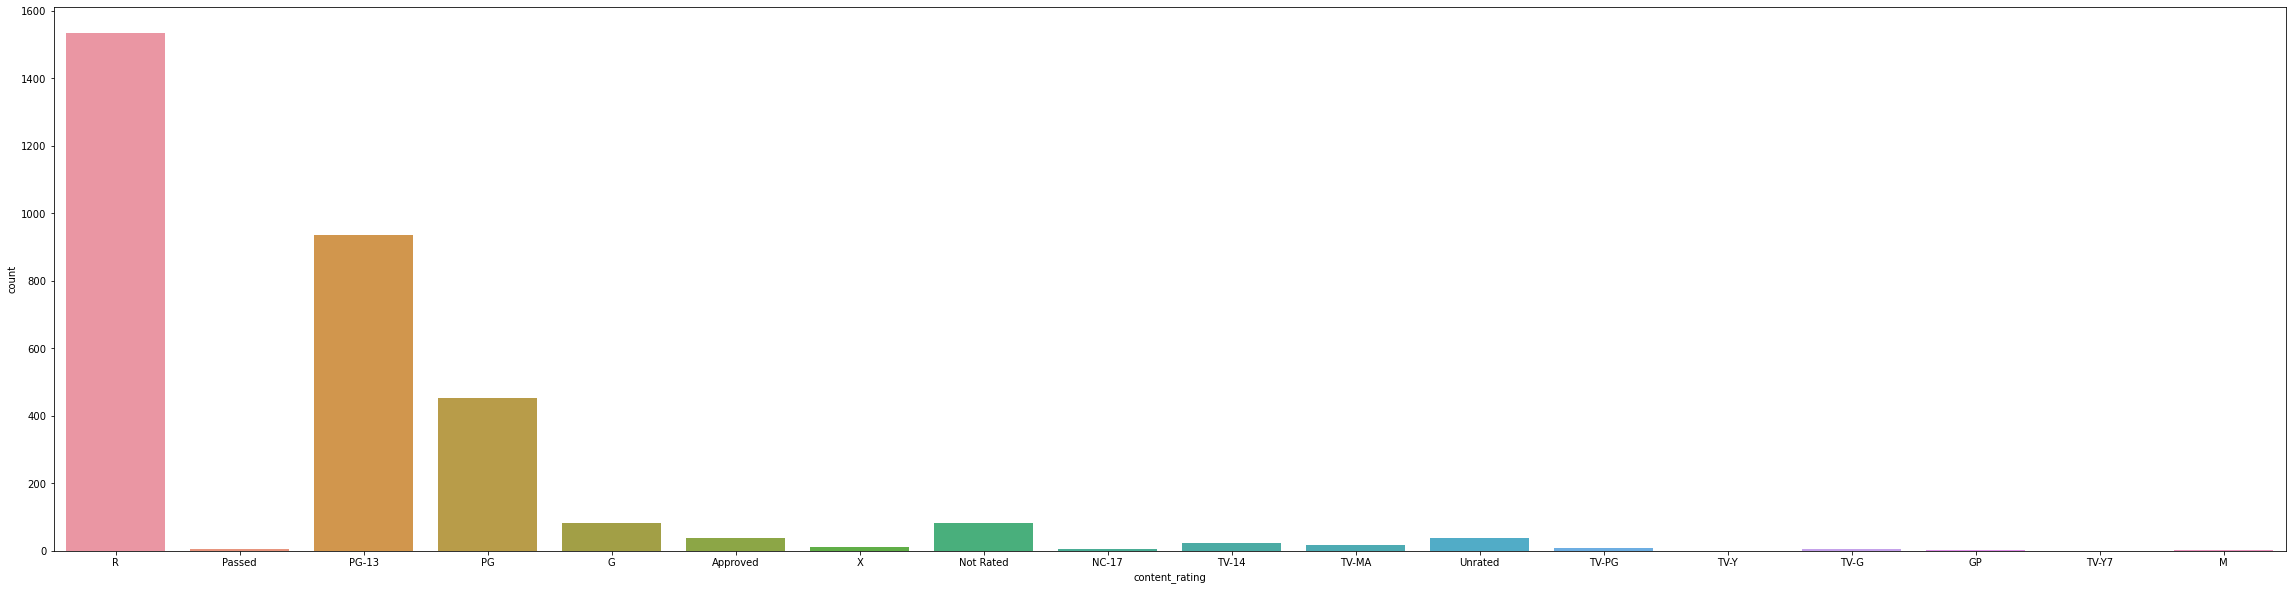

In [29]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X_train)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [30]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

2799         R
4262    others
98           R
495      PG-13
3499     PG-13
         ...  
35      others
2882         R
4456         R
329      PG-13
4605         R
Name: content_rating, Length: 3253, dtype: object

In [31]:
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [32]:
value_counts = X_train["plot_keywords"].value_counts()
value_counts

1940s|child hero|fantasy world|orphan|reference to peter pan                   112
animal name in title|ape abducts a woman|gorilla|island|king kong                3
based on novel                                                                   3
assistant|experiment|frankenstein|medical student|scientist                      3
emaciation|male nudity|plane crash|prisoner of war|torture                       2
                                                                              ... 
air traffic controller|nuclear waste|orgasm|telekinesis|voodoo                   1
american south|baseball|farmland|motel|road trip                                 1
ghost|irish|kissing|novelist|widower                                             1
dubai|kremlin|race against time|russian|terrorist                                1
number in title|train|woman slaps a man|woman slaps man|written by director      1
Name: plot_keywords, Length: 3075, dtype: int64

In [33]:
#sns.countplot(x="plot_keywords", data=X_train)

Same as genres, data is too complex and interconnected. Dropping this value

In [34]:
X_train = X_train.drop("plot_keywords", axis=1)
X_test = X_test.drop("plot_keywords", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

### Correlation

<AxesSubplot:>

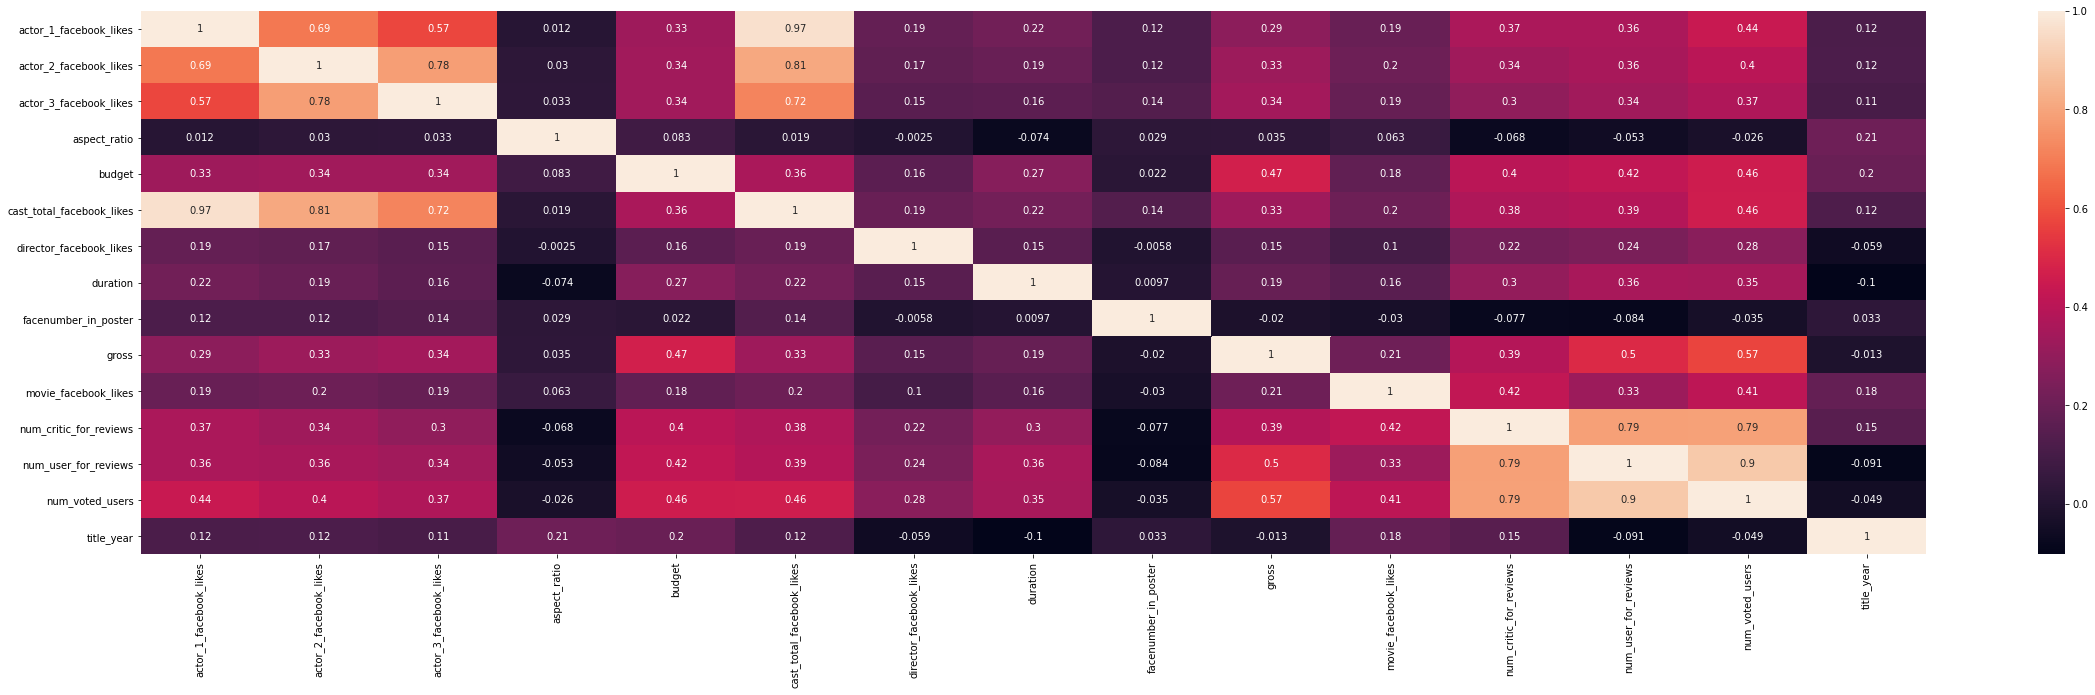

In [35]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y_train
sns.heatmap(heatmap.corr(), annot=True)

From the heatmap, several insights that were gained were
- Cast total Facebook likes and number of likes of actor 1 are highly correlated (0.97)
- Number of user for reviews and number of voted users are highly correlated (0.8)
- Number of likes of actor 2 and 3 are highly correlated (0.79)
- Total Facebook likes of actor are the representative of number of likes of actor 1,2,3

Drop actor 1,2,3 and keep the total actor facebook likes

In [36]:
def drop_actors_likes(X):
    X_copy = X.copy()
    X_copy.drop("actor_1_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_2_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_3_facebook_likes", axis=1, inplace=True)
    return X_copy
X_train = drop_actors_likes(X_train)
X_test = drop_actors_likes(X_test)
X_test.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

num_user_for_reviews over num_voted_users

In [37]:
def user_reviews_over_voted(X):
    X_copy = X.copy()
    X_copy["user_reviews_over_voted"] = X_copy["num_user_for_reviews"] / X_copy["num_voted_users"]
    X_copy.drop("num_user_for_reviews", axis=1, inplace=True)
    X_copy.drop("num_voted_users", axis=1, inplace=True)
    return X_copy
X_train = user_reviews_over_voted(X_train)
X_test = user_reviews_over_voted(X_test)
X_train.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

<AxesSubplot:>

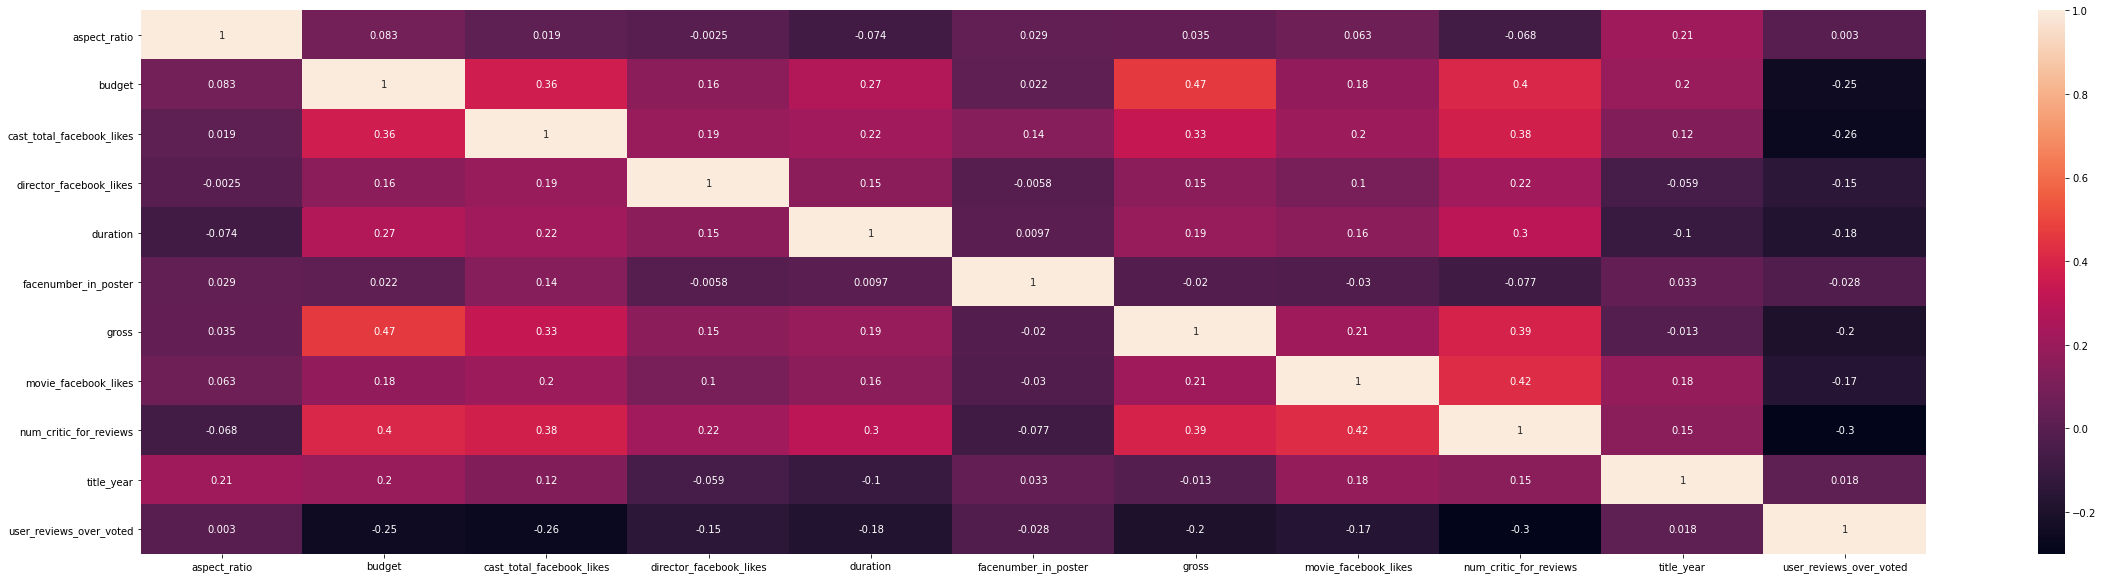

In [38]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Encoding

#### Integer to Float

In [39]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X_train = int_to_float(X_train)
X_test = int_to_float(X_test)
X_train.dtypes


aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

#### String to One-hot

In [40]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,title_year,user_reviews_over_voted,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,country_France,country_UK,country_USA,country_others
2799,1.238132,61.169088,10.784708,0.000000,3.253153,0.000000,57.855961,0.000000,3.736876,6.692413,0.290061,0,0,1,0,0,0,1,0
4262,1.081883,35.643134,7.109642,1.565085,3.302834,1.681793,70.597606,3.919476,1.861210,6.636673,0.349874,0,0,0,1,0,0,1,0
98,1.238132,66.021958,5.141849,2.300327,3.309751,0.000000,70.597606,0.000000,1.000000,6.700738,0.431785,0,0,1,0,0,0,0,1
495,1.238132,81.444764,5.582192,2.828427,3.302834,0.000000,68.071690,0.000000,3.631929,6.687403,0.375968,0,1,0,0,0,0,1,0
3499,1.238132,51.436867,7.467756,3.216221,3.281818,1.000000,61.827781,0.000000,2.902783,6.699075,0.239791,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1.166253,118.920712,11.041463,2.466326,3.193437,0.000000,128.006302,14.483155,4.403489,6.698244,0.183245,0,0,0,1,0,0,1,0
2882,1.238132,71.407419,14.095323,4.015534,3.201086,0.000000,73.066365,10.000000,3.838088,6.694914,0.218591,0,0,1,0,0,0,1,0
4456,1.238132,34.397906,5.834731,2.759669,3.088591,0.000000,70.597606,3.864348,1.414214,6.699075,0.367206,0,0,1,0,0,0,1,0
329,1.166253,97.400375,10.828290,0.000000,3.105423,1.000000,87.818244,0.000000,3.605551,6.690744,0.300763,0,1,0,0,0,0,1,0


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train.values, dtype=float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features   VIF
18             country_others   inf
12       content_rating_PG-13   inf
17                country_USA   inf
16                 country_UK   inf
15             country_France   inf
14      content_rating_others   inf
13           content_rating_R   inf
11          content_rating_PG   inf
8      num_critic_for_reviews  1.75
1                      budget  1.66
6                       gross  1.57
2   cast_total_facebook_likes  1.44
9                  title_year  1.42
4                    duration  1.29
7        movie_facebook_likes  1.27
10    user_reviews_over_voted  1.18
3     director_facebook_likes  1.10
0                aspect_ratio  1.10
5        facenumber_in_poster  1.05


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

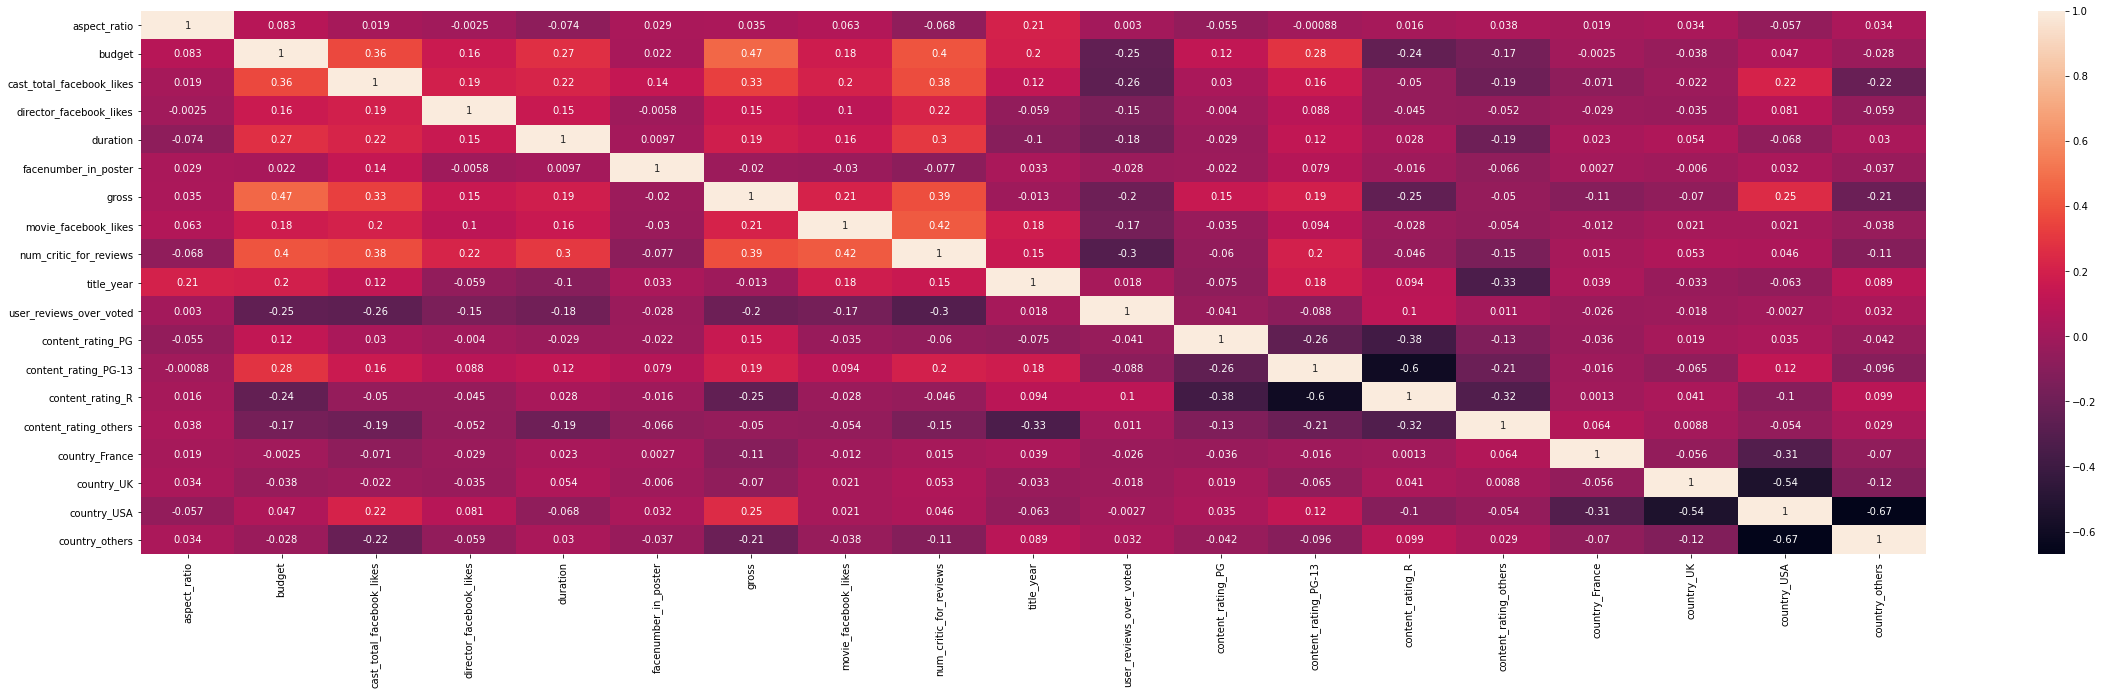

In [42]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Normalization

In [43]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.20452595, 0.17445247, 0.37884511, ..., 0.        , 1.        ,
        0.        ],
       [0.04138433, 0.09677358, 0.24974742, ..., 0.        , 1.        ,
        0.        ],
       [0.20452595, 0.1892204 , 0.1806228 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20452595, 0.09298418, 0.20496238, ..., 0.        , 1.        ,
        0.        ],
       [0.12947675, 0.28470912, 0.38037605, ..., 0.        , 1.        ,
        0.        ],
       [0.11779084, 0.08453909, 0.20623264, ..., 0.        , 1.        ,
        0.        ]])

# Model

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred=lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [46]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Classification Report: 
               precision    recall  f1-score   support

         low       0.69      0.73      0.71       428
        high       0.68      0.65      0.66       386

    accuracy                           0.69       814
   macro avg       0.69      0.69      0.69       814
weighted avg       0.69      0.69      0.69       814
 

Accuracy on train:   0.733 

Accuracy on test:  0.688 



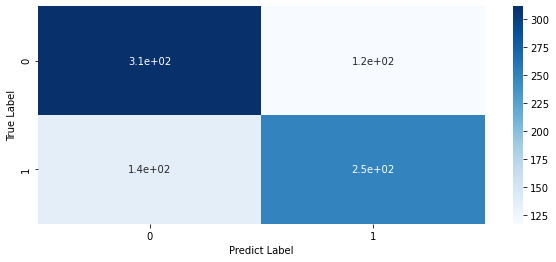

In [47]:
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",lr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",lr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [48]:
lr.intercept_

array([0.62117072])

In [49]:
lr.coef_

array([[ 1.29967067, -3.37891947, -0.49726607,  1.08969424,  3.38042632,
        -0.29263395,  0.53415309,  1.52003594,  3.55549853, -4.33761908,
        -0.54349377, -0.21473225, -0.62966514,  0.15212691,  0.69357615,
         0.06840047,  0.49708073, -0.61048731,  0.04631178]])

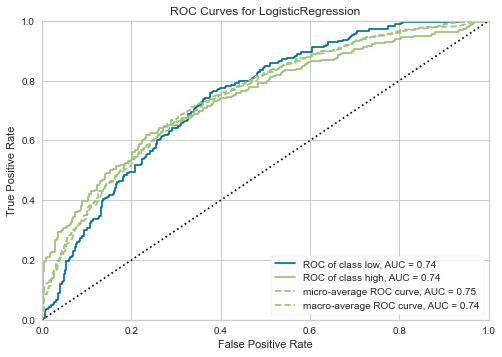

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr, classes=["low","high"])
visualizer.fit(X_train, y_train)                    # Fit the training data to the visualizer
visualizer.score(X_test, y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()   

In [51]:
lr.intercept_

array([0.62117072])